## Fake Job Posting Detection
This project aims to classify job postings as real or fake using machine learning and NLP.


#### Importing suitable libraries

In [1]:
import numpy as np
import pandas as pd

#### Data Loading

In [2]:
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### Data Exploration

In [4]:
df.shape

(17880, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

#### Preprocessing and cleaning

In [8]:
text_cols = ['title','company_profile','description','requirements','benefits']
for col in text_cols:
    df[col] = df[col].fillna("")

cat_cols = ['employment_type','required_experience','required_education']
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

#### Feature Engineering

In [9]:
df['combined_text'] = (
    df['title'] + " " +
    df['company_profile'] + " " +
    df['description'] + " " +
    df['requirements'] + " " +
    df['benefits']
)


#### Vectorization

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['combined_text']
y = df['fraudulent']

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = tfidf.fit_transform(X)


#### Model Development

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#### Model Evaluation

In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       1.00      0.45      0.62       173

    accuracy                           0.97      3576
   macro avg       0.99      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576



#### Importing all required models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.metrics import classification_report, f1_score

#### Defining Models Dictionary

In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

#### Training and Evaluating Each Model

In [17]:
results = {}

for name, model in models.items():
    print("=" * 60)
    print(f"Training Model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    results[name] = f1
    
    print(classification_report(y_test, y_pred))

Training Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       1.00      0.45      0.62       173

    accuracy                           0.97      3576
   macro avg       0.99      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576

Training Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3403
           1       0.00      0.00      0.00       173

    accuracy                           0.95      3576
   macro avg       0.48      0.50      0.49      3576
weighted avg       0.91      0.95      0.93      3576

Training Model: Linear SVM
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       1.00      0.74      0.85       173

    accuracy                           0.99      3576
   macro avg       0.99      0.87    

#### Creating comparision table

In [18]:
import pandas as pd

results_df = pd.DataFrame.from_dict(
    results, orient="index", columns=["F1_Score"]
)

results_df = results_df.sort_values(by="F1_Score", ascending=False)
results_df

,F1_Score
Linear SVM,0.850498
Logistic Regression,0.616000
Naive Bayes,0.000000



#### Model Comparision Using F1-Score

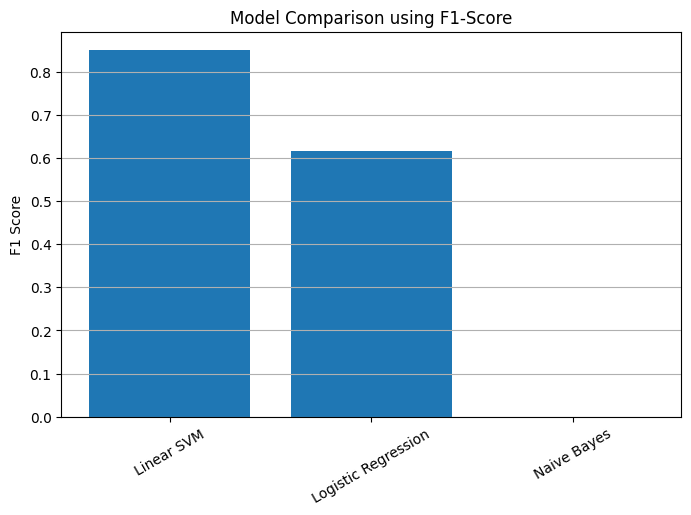

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame.from_dict(
    results, orient="index", columns=["F1_Score"]
).sort_values(by="F1_Score", ascending=False)

plt.figure(figsize=(8,5))
plt.bar(results_df.index, results_df["F1_Score"])
plt.xticks(rotation=30)
plt.ylabel("F1 Score")
plt.title("Model Comparison using F1-Score")
plt.grid(axis='y')
plt.show()


#### Confusion matrix for all models

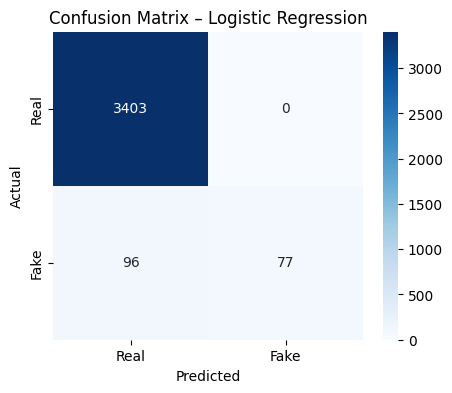

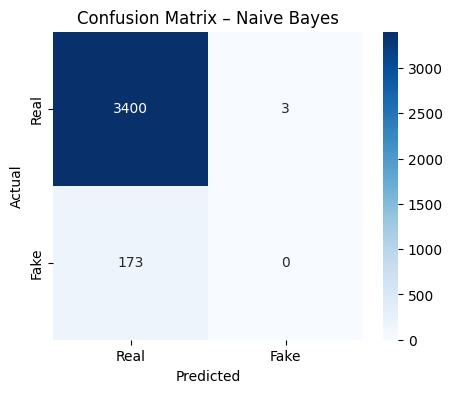

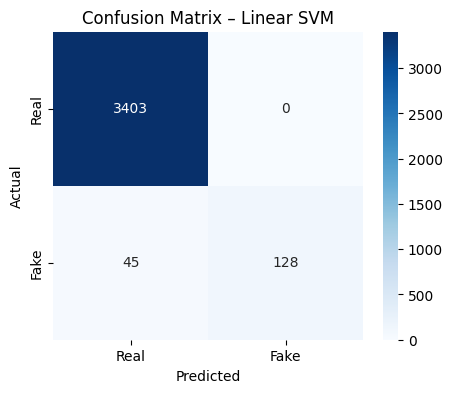

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Real', 'Fake'],
                yticklabels=['Real', 'Fake'])
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix – {name}")
    plt.show()

#### Precision - Recall curve

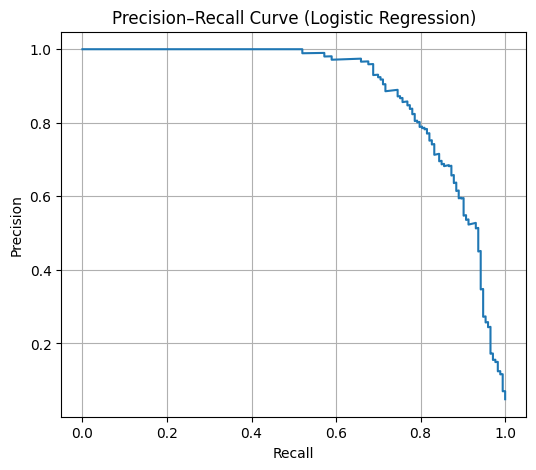

In [24]:
from sklearn.metrics import precision_recall_curve

model = models["Logistic Regression"]
y_scores = model.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Logistic Regression)")
plt.grid()
plt.show()

#### Selecting the best model

In [19]:
best_model_name = results_df.index[0]
best_f1 = results_df.iloc[0, 0]

print(f"Best Model: {best_model_name}")
print(f"Best F1 Score: {best_f1}")

Best Model: Linear SVM
Best F1 Score: 0.8504983388704319


In [25]:
from sklearn.svm import LinearSVC

# Re-initialize the final model
final_model = LinearSVC()

# Train on FULL dataset
final_model.fit(X_tfidf, y)

print("Final SVM model trained on full dataset")

Final SVM model trained on full dataset


#### Save model and vectorizer

In [26]:
import pickle

# Save final model
pickle.dump(final_model, open("final_fake_job_svm_model.pkl", "wb"))

# Save TF-IDF vectorizer
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

print("Final SVM model and TF-IDF vectorizer saved successfully")

Final SVM model and TF-IDF vectorizer saved successfully


## Manual Testing

The trained model was manually tested with sample job descriptions
to verify prediction behavior. The model demonstrated reasonable
classification of real and fake job postings based on learned patterns.

#### Verify the saved model

In [27]:
# Load back the model
loaded_model = pickle.load(open("final_fake_job_svm_model.pkl", "rb"))
loaded_tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

# Test with sample input
sample_text = "Work from home job. No experience required. Contact via WhatsApp."

sample_vec = loaded_tfidf.transform([sample_text])
prediction = loaded_model.predict(sample_vec)

print("Prediction:", prediction)

Prediction: [0]


## Final Model Training and Saving

After selecting Linear SVM as the best-performing model based on F1-score
and confusion matrix analysis, the model was retrained on the full dataset
and saved along with the TF-IDF vectorizer for future deployment.